In [1]:
# =========================
# Cell 1 — Imports & Debug
# =========================

import os
import random

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.signal import find_peaks, medfilt

# -------------------------
# Reproducibility
# -------------------------
random.seed(42)
np.random.seed(42)

I am going to check for the `cv2` functions which can be deployed here in step 2

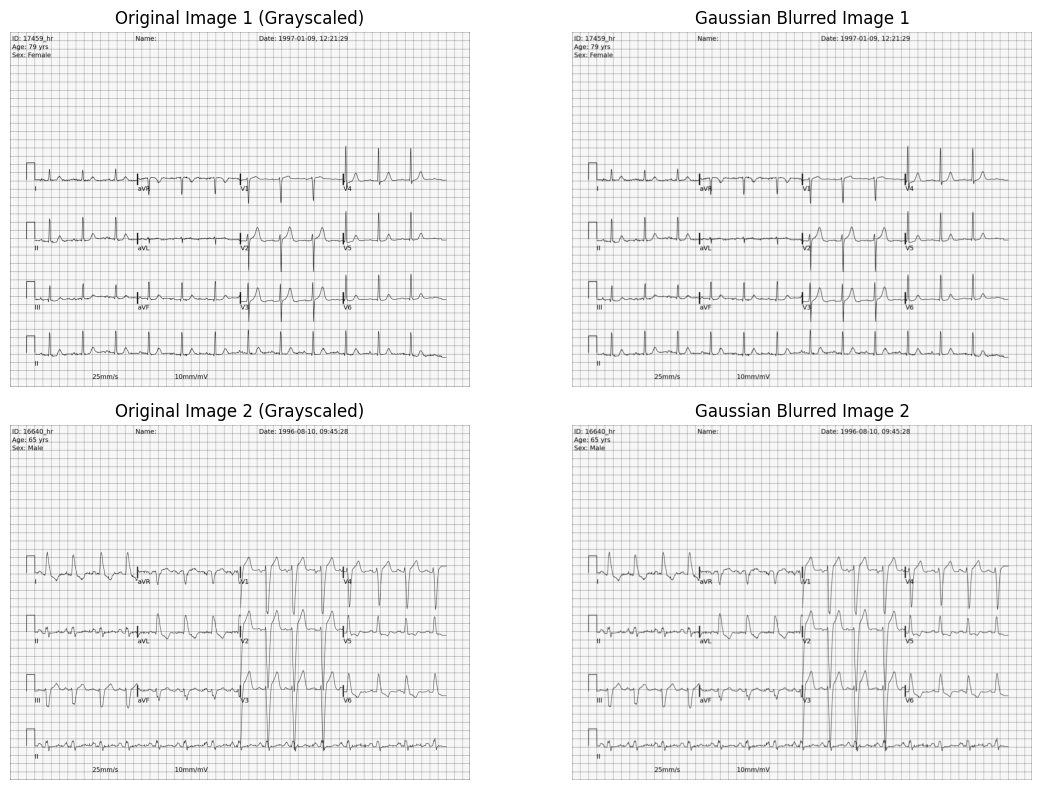

In [9]:
# understanding the effects of Gaussian Nlur in step 2

test_img_1_path = '../physionet_ecg_competition_2025/test/1053922973.png'
test_img_2_path = '../physionet_ecg_competition_2025/test/2352854581.png'

test_img1 = cv2.imread(test_img_1_path, cv2.IMREAD_UNCHANGED)
test_img2 = cv2.imread(test_img_2_path, cv2.IMREAD_UNCHANGED)

gray_img1 = cv2.cvtColor(test_img1, cv2.COLOR_BGR2GRAY)
gray_img2 = cv2.cvtColor(test_img2, cv2.COLOR_BGR2GRAY)

# The Gaussian Blur takes a grayscale image as input.
# A kernel size with odd and positive dimnesions of (widtth, height)
# typically of (5, 5) is used.
# The sigma value of 0 lets OpenCV compute it based on the kernel size.
# used before edge detection (e.g., Canny edge detector) to ensure the 
# algorithm focuses on structural features rather than random, high-frequency noise.
gaussian_blur_img1 = cv2.GaussianBlur(gray_img1, (5, 5), 0)
gaussian_blur_img2 = cv2.GaussianBlur(gray_img2, (5, 5), 0)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

ax1.set_title('Original Image 1 (Grayscaled)')
ax1.imshow(gray_img1, cmap='gray')
ax1.axis('off')

ax2.set_title('Gaussian Blurred Image 1')
ax2.imshow(gaussian_blur_img1, cmap='gray')
ax2.axis('off')

ax3.set_title('Original Image 2 (Grayscaled)')
ax3.imshow(gray_img2, cmap='gray')
ax3.axis('off')

ax4.set_title('Gaussian Blurred Image 2')
ax4.imshow(gaussian_blur_img2, cmap='gray')
ax4.axis('off')

plt.tight_layout()
plt.show()

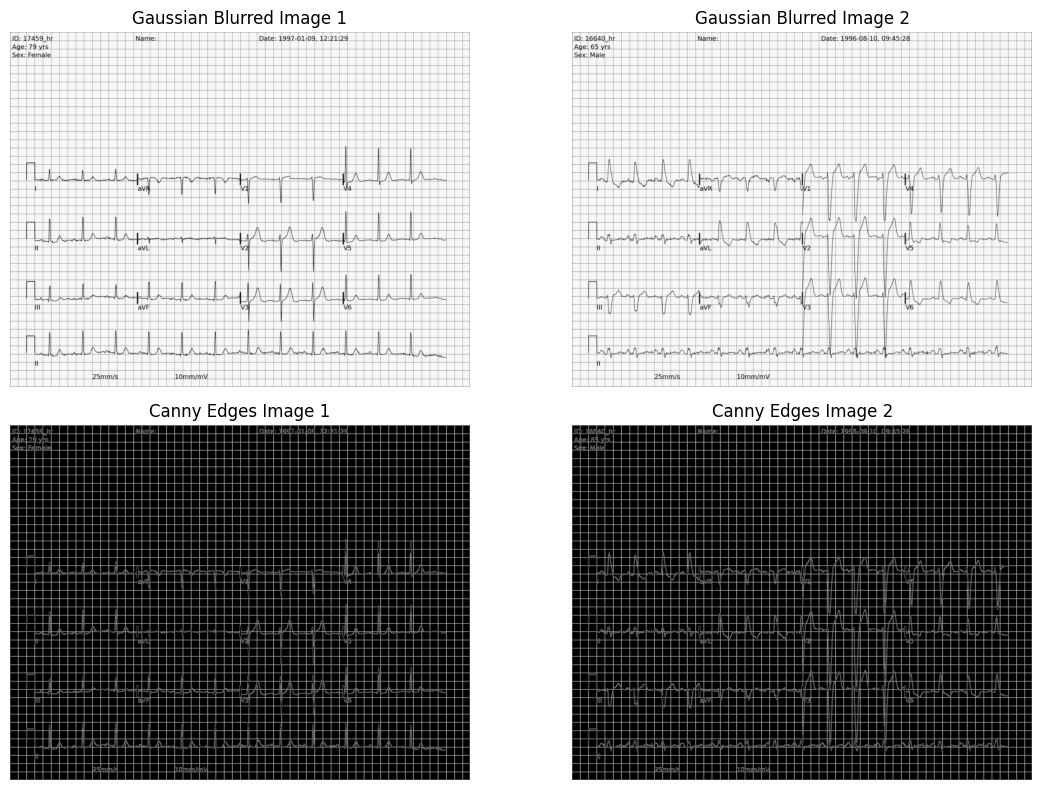

In [ ]:
# understanding the purpose of Canny edge detection in step 2

# It identifies the sharp changes in pixel intensity corresponding to 
# the ECG signal lines and graph grid lines.
# Through its multi-stage process (Gaussian blurring, gradient calculation,
# and hysteresis thresholding), it suppresses noise to prevent false detections,
# which is critical when dealing with noisy, scanned, or photographed ECG paper.
# It suppresses non-maximum pixels to produce thin, clean, and distinct edges
# , rather than thick, fuzzy lines.
# The resulting binary edge image is subsequently used with the
# Hough Transform to detect lines and calculate the rotation angle
# required to straighten (deskew) the image.
canny_edges_img1 = cv2.Canny(gaussian_blur_img1, 50, 150)
canny_edges_img2 = cv2.Canny(gaussian_blur_img2, 50, 150)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

ax1.set_title('Gaussian Blurred Image 1')
ax1.imshow(gaussian_blur_img1, cmap='gray')
ax1.axis('off')

ax2.set_title('Gaussian Blurred Image 2')
ax2.imshow(gaussian_blur_img2, cmap='gray')
ax2.axis('off')

ax3.set_title('Canny Edges Image 1')
ax3.imshow(canny_edges_img1, cmap='gray')
ax3.axis('off')

ax4.set_title('Canny Edges Image 2')
ax4.imshow(canny_edges_img2, cmap='gray')
ax4.axis('off')

plt.tight_layout()
plt.show()

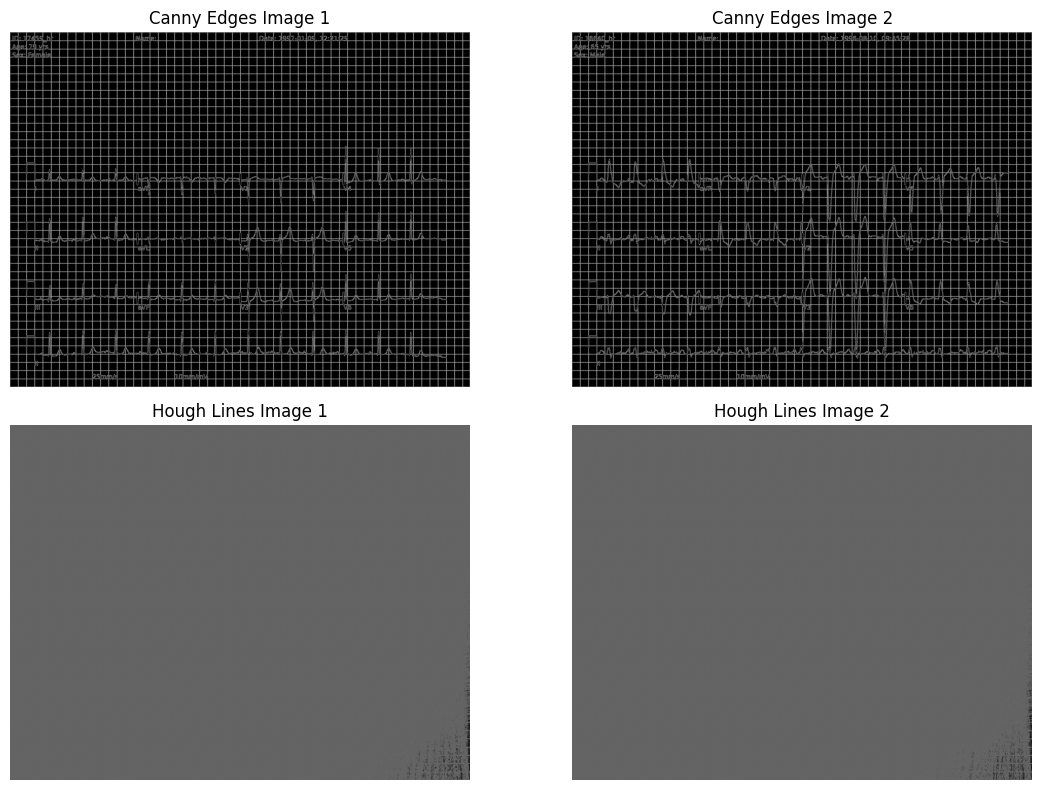

In [33]:
# understanding the role of Hough Lines in step 2

houghlines_img1 = canny_edges_img1.copy()
houghlines_img2 = canny_edges_img2.copy()

# - The function returns a NumPy array with the shape (n, 1, 2), where: 
#  * n is the number of lines detected.
#  * Each inner [rho, theta] array represents a single line.
lines1 = cv2.HoughLines(canny_edges_img1, rho=1, theta=np.pi / 180, threshold=150)
lines2 = cv2.HoughLines(canny_edges_img2, rho=1, theta=np.pi / 180, threshold=150)

# Convert polar coordinates to Cartesian coordinates for line endpoints
# rho: distance from origin to the line
# theta: angle of the line normal
for rho, theta in lines1[:, 0]:
    a = np.cos(theta) # cosine of theta yields the x-component of the line's direction vector
    b = np.sin(theta) # sine of theta yields the y-component of the line's direction vector
    x0 = a * rho # x-coordinate of a point on the line
    y0 = b * rho # y-coordinate of a point on the line
    # Here, the '1900' is a large value to ensure the line extends beyond the image boundaries
    # The `-b` indicates the perpendicular direction to the line.
    x1 = int(x0 + 1900 * (-b)) # extending the line in both directions for visualization
    # The `a` indicates the direction along the line.
    y1 = int(y0 + 1900 * (a)) # extending the line in both directions for visualization
    x2 = int(x0 - 1900 * (-b)) # extending the line in both directions for visualization
    y2 = int(y0 - 1900 * (a)) # extending the line in both directions for visualization
    # In this line function:
    # - (x1, y1) and (x2, y2) are the endpoints of the line to be drawn.
    # - (100, 0, 0) specifies the color of the line in BGR format (grayish color here).
    # - 1 is the thickness of the line.
    cv2.line(houghlines_img1, (x1, y1), (x2, y2), (100, 100, 100), 1)

# Convert polar coordinates to Cartesian coordinates for line endpoints
# rho: distance from origin to the line
# theta: angle of the line normal
for rho, theta in lines2[:, 0]:
    a = np.cos(theta) # cosine of theta yields the x-component of the line's direction vector
    b = np.sin(theta) # sine of theta yields the y-component of the line's direction vector
    x0 = a * rho # x-coordinate of a point on the line
    y0 = b * rho # y-coordinate of a point on the line
    # Here, the '1900' is a large value to ensure the line extends beyond the image boundaries
    # The `-b` indicates the perpendicular direction to the line.
    x1 = int(x0 + 1900 * (-b)) # extending the line in both directions for visualization
    # The `a` indicates the direction along the line.
    y1 = int(y0 + 1900 * (a)) # extending the line in both directions for visualization
    x2 = int(x0 - 1900 * (-b)) # extending the line in both directions for visualization
    y2 = int(y0 - 1900 * (a)) # extending the line in both directions for visualization
    # In this line function:
    # - (x1, y1) and (x2, y2) are the endpoints of the line to be drawn.
    # - (100, 0, 0) specifies the color of the line in BGR format (grayish color here).
    # - 1 is the thickness of the line.
    cv2.line(houghlines_img2, (x1, y1), (x2, y2), (100, 100, 100), 1)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))
ax1.set_title('Canny Edges Image 1')
ax1.imshow(canny_edges_img1, cmap='gray')
ax1.axis('off')

ax2.set_title('Canny Edges Image 2')
ax2.imshow(canny_edges_img2, cmap='gray')
ax2.axis('off')

ax3.set_title('Hough Lines Image 1')
ax3.imshow(houghlines_img1, cmap='gray')
ax3.axis('off')

ax4.set_title('Hough Lines Image 2')
ax4.imshow(houghlines_img2, cmap='gray')
ax4.axis('off')

plt.tight_layout()
plt.show()

In [6]:
# ======================================
# Cell 2 — Image Loading & Deskewing
# ======================================

def load_image(path: str) -> np.ndarray:
    """
    Safely load an ECG image.
    Ensures BGR format for OpenCV compatibility.
    """
    img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    if img is None:
        raise FileNotFoundError(f"Could not read image: {path}")

    # Convert grayscale → BGR for uniform downstream handling
    if img.ndim == 2:
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    return img

def deskew_image(img_bgr: np.ndarray) -> np.ndarray:
    """
    Estimate and correct image skew using dominant horizontal grid lines.
    """
    gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Canny edges for line detection
    edges = cv2.Canny(blur, 50, 150, apertureSize=3)

    # Hough line detection: threshold is 'votes' needed to identify a line.
    # 150 is a reasonable starting point for large images.
    lines = cv2.HoughLines(edges, rho=1, theta=np.pi/180, threshold=150)

    collected_thetas = []
    if lines is not None:
        for line in lines:
            rho, theta = line[0]
            # LOGIC FIX: Keep lines that are near-horizontal.
            # In Hough space, horizontal lines have theta near pi/2 (90 degrees).
            if abs(theta - np.pi/2) < np.deg2rad(10):
                collected_thetas.append(theta)

    if not collected_thetas:
        print("[deskew] No horizontal lines detected, skipping.")
        return img_bgr.copy()

    # Median theta is more robust against outlier diagonal noise
    median_theta = np.median(collected_thetas)
    
    # Calculate skew angle in degrees.
    # If theta is 95 deg, the deviation from 90 deg is 5 deg.
    skew_angle_deg = np.rad2deg(median_theta - np.pi/2)

    # ANGLE FIX: To 'undo' a skew, we rotate by the skew itself in getRotationMatrix2D
    # because getRotationMatrix2D uses counter-clockwise positive rotation.
    if abs(skew_angle_deg) < 0.1:
        return img_bgr.copy()

    h, w = img_bgr.shape[:2]
    center = (w // 2, h // 2)
    
    # Generate the 2x3 rotation matrix
    M = cv2.getRotationMatrix2D(center, angle=skew_angle_deg, scale=1.0)

    # BORDER FIX: For ECGs/documents, BORDER_REPLICATE can cause streaking. 
    # BORDER_CONSTANT with a white background is cleaner for grids.
    rotated = cv2.warpAffine(
        img_bgr,
        M,
        (w, h),
        flags=cv2.INTER_LINEAR,
        borderMode=cv2.BORDER_CONSTANT, # replicate the border, to prevent the 
        # 'streaks' at borders of image
        borderValue=(255, 255, 255)  # Fills empty space with white
    )

    return rotated

[load_image] Loaded image shape: (1700, 2200, 4)
[load_image] Loaded image shape: (1700, 2200, 4)


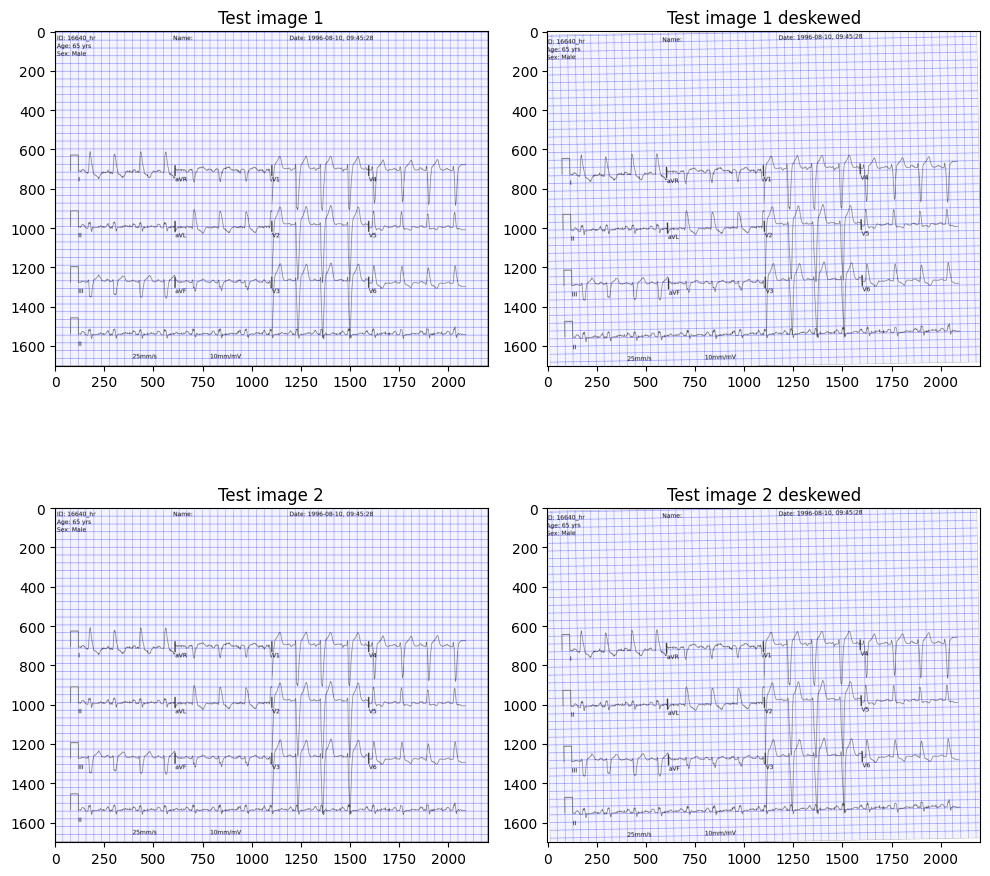

In [3]:
# =======================================================
# Cell 2.1 - Sanity check of loading & deskewing function
# =======================================================

output_dir = '../working'

test_imgs = '../physionet_ecg_competition_2025/test'
test_img_1 = f"{test_imgs}/2352854581.png"
test_img_2 = f"{test_imgs}/2352854581.png"

img1 = load_image(test_img_1)
img2 = load_image(test_img_2)
deskewed_1 = deskew_image(img1)
deskewed_2 = deskew_image(img2)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (10, 10))

ax1.imshow(img1)
ax1.set_title('Test image 1')

ax2.imshow(deskewed_1)
ax2.set_title('Test image 1 deskewed')

ax3.imshow(img2)
ax3.set_title('Test image 2')

ax4.imshow(deskewed_2)
ax4.set_title('Test image 2 deskewed')

plt.savefig(f'{output_dir}/my_four_images.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

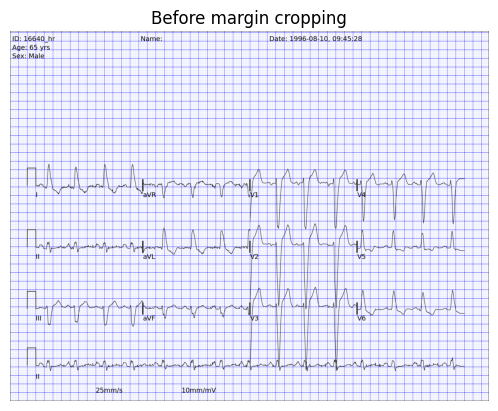

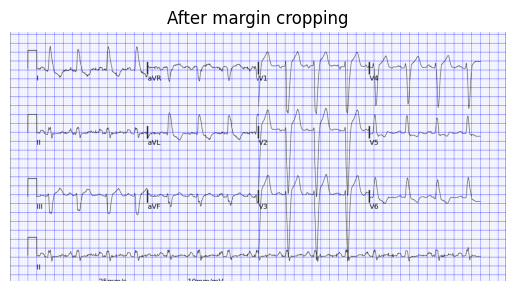

In [5]:
# =====================================
# Cell 3 - Splitting the 12 leads
# =====================================

# ============================================================
# Cell 3.0.0 - Top to bottom cropping technique's sanity check
# ============================================================

h, w = img1.shape[:2]

top_crop = int(0.32 * h)    # removes patient metadata
bottom_crop = int(0.03 * h) # removes scale text

cropped_image = img1[top_crop : h - bottom_crop, :]

plt.imshow(img1)
plt.title("Before margin cropping")
plt.axis("off")
plt.show()

plt.imshow(cropped_image)
plt.title("After margin cropping")
plt.axis("off")
plt.show()

Cropped test for horizontal 1st shaped:  (375, 2200, 4)
For 2nd crop starting point:  375
Cropped test for horizontal 2nd shaped:  (413, 2200, 4)
For 3rd crop starting point:  613
Cropped test for horizontal 3rd shaped:  (338, 2200, 4)
For 4th crop starting point:  876
Cropped test for horizontal 4th shaped:  (195, 2200, 4)


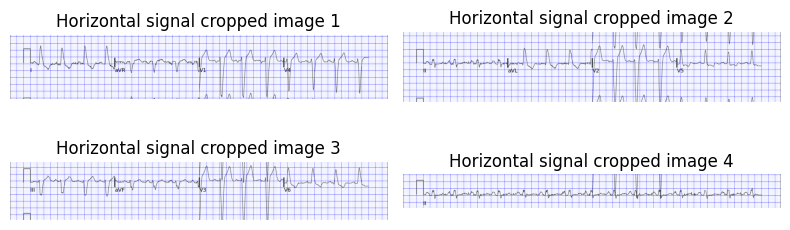

In [6]:
# ================================================================================
# Cell 3.0.1 - Sanity check of horizontal bands cropping techniques to be deployed
# ================================================================================

# cropped_image.shape: (1105, 2200, 4)
cropped_copy = cropped_image.copy()
horizontal_sign_imgs = []
start_crop = 0
height1 = int(cropped_copy.shape[0])

test_sign_crop1 = cropped_copy[start_crop : int(height1*0.34), :] # shape: (375, 2200, 4)
print("Cropped test for horizontal 1st shaped: ", test_sign_crop1.shape)
horizontal_sign_imgs.append(test_sign_crop1)

start_crop = int(test_sign_crop1.shape[0])
print("For 2nd crop starting point: ", start_crop)
height2 = int(height1 - int(test_sign_crop1.shape[0])) - 55
test_sign_crop2 = cropped_copy[int(start_crop - (start_crop * 0.3)) : height2]
print("Cropped test for horizontal 2nd shaped: ", test_sign_crop2.shape) # shape: (413, 2200, 4)
horizontal_sign_imgs.append(test_sign_crop2)

start_crop = int(test_sign_crop2.shape[0]) + 200
print("For 3rd crop starting point: ", start_crop)
height3 = int(height1 - int(height1 * 0.14))
test_sign_crop3 = cropped_copy[start_crop : height3, :]
print("Cropped test for horizontal 3rd shaped: ", test_sign_crop3.shape) # shape: (338, 2200, 4)
horizontal_sign_imgs.append(test_sign_crop3)

start_crop = (int(test_sign_crop3.shape[0])*2) + 200
print("For 4th crop starting point: ", start_crop)
height4 = int(height1 - height1 * 0.03)
test_sign_crop4 = cropped_copy[start_crop : height4, :]
print("Cropped test for horizontal 4th shaped: ", test_sign_crop4.shape) # shape: (195, 2200, 4)
horizontal_sign_imgs.append(test_sign_crop4)

fig, axs = plt.subplots(2, 2, figsize=(8, 3))

for i, ax in enumerate(axs.flat):
    img = horizontal_sign_imgs[i]
    ax.set_title(f"Horizontal signal cropped image {i+1}")
    ax.imshow(img)
    ax.axis('off')

plt.savefig(f'{output_dir}/horizontal_signal_crops.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

In [7]:
# ====================================================================================
# Cell 3.0.2 - Splitting 12 leads based on the vertical separators of horizontal bands
# ====================================================================================

def get_precise_boundaries(band_img, num_leads=4, debug=False):
    """
    Computes precise vertical lead boundaries using ECG grid geometry.
    Anchors boundaries to bold (5 mm) grid lines.
    """

    # 1. Convert to grayscale
    gray = cv2.cvtColor(band_img, cv2.COLOR_BGR2GRAY)

    # 2. Emphasize vertical grid lines
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobelx = np.abs(sobelx)
    sobelx /= (sobelx.max() + 1e-6)

    # 3. Column-wise vertical energy
    col_energy = sobelx.mean(axis=0)

    # 4. Smooth profile
    col_energy = cv2.GaussianBlur(
        col_energy.reshape(1, -1),
        (1, 31),
        0
    ).ravel()

    # 5. Detect bold vertical grid lines
    peaks, _ = find_peaks(
        col_energy,
        distance=30,
        prominence=np.percentile(col_energy, 80)
    )

    if len(peaks) < 10:
        raise RuntimeError("Insufficient grid lines detected")

    # 6. Grid spacing between bold lines (≈5 mm)
    diffs = np.diff(peaks)
    bold_grid_spacing_px = np.median(diffs)

    # 7. Convert to pixels per mm
    pixels_per_mm = bold_grid_spacing_px / 5.0

    # 8. Lead width (ECG standard)
    lead_width_px = int(62.5 * pixels_per_mm)

    # 9. Anchor to first valid grid line
    first_x = peaks[0]

    boundaries = []
    for i in range(num_leads):
        x_start = int(first_x + i * lead_width_px)
        x_end   = int(x_start + lead_width_px)
        boundaries.append((x_start, x_end))

    # 10. Debug visualization
    if debug:
        dbg = band_img.copy()
        for i, (x0, x1) in enumerate(boundaries):
            cv2.line(dbg, (x0, 0), (x0, dbg.shape[0]), (0, 255, 0), 2)
            cv2.line(dbg, (x1, 0), (x1, dbg.shape[0]), (0, 0, 255), 2)
            cv2.putText(
                dbg, f"L{i+1}", (x0 + 5, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2
            )

        plt.figure(figsize=(14, 3))
        plt.imshow(dbg)
        plt.title("Grid-anchored lead boundaries")
        plt.axis("off")
        plt.show()

    return boundaries



def split_ecg_panels_refined(img_bgr, debug=False):
    h, w = img_bgr.shape[:2]

    # 1. Crop margins (Your empirical values)
    top_crop = int(0.32 * h)
    bottom_crop = int(0.03 * h)
    core = img_bgr[top_crop : h - bottom_crop, :]
    core_h, core_w = core.shape[:2]

    # 2. Split into 4 horizontal bands

    h1 = int(core_h)
    band1 = core[0 : int(h1 * 0.34), :]

    start_crop = int(band1.shape[0])
    h2 = int(core_h - start_crop) - 55
    band2 = core[int(start_crop - (start_crop * 0.3)) : h2, :]

    start_crop = int(band2.shape[0]) + 200
    h3 = int(h1 - int(h1 * 0.14))
    band3 = core[start_crop : h3, :] # Approximation based on height3

    start_crop = (int(band3.shape[0]) * 2) + 200
    h4 = int(h1 - int(h1 * 0.03))
    band4 = core[start_crop : h4, :]

    bands = [band1, band2, band3, band4]

    # 3. Detect precise vertical boundaries using the first band
    # This identifies the 4 columns by finding the 3 separators
    lead_boundaries = get_precise_boundaries(band1, debug=debug)
    lead_layout = [
        ["I",   "aVR", "V1", "V4"],
        ["II",  "aVL", "V2", "V5"],
        ["III", "aVF", "V3", "V6"]
    ]

    panels = {}

    # 4. Extract 12 leads using dynamic boundaries
    for r in range(3):
        for c in range(4):
            x_start, x_end = lead_boundaries[c]
            # Sanity check — do NOT silently clip
            if x_start < 0 or x_end > core_w:
                raise ValueError(
                    f"Lead boundary out of bounds: ({x_start}, {x_end}) "
                    f"for image width {core_w}"
                )

            panels[lead_layout[r][c]] = bands[r][:, x_start:x_end]

    # 5. Rhythm strip (Full Lead II)
    panels["II_full"] = bands[3]

    if debug:
        dbg = band1.copy()
        for i, (x0, x1) in enumerate(lead_boundaries):
            cv2.line(dbg, (x0, 0), (x0, dbg.shape[0]), (0, 255, 0), 2)
            cv2.line(dbg, (x1, 0), (x1, dbg.shape[0]), (0, 0, 255), 2)
            cv2.putText(
                dbg, f"L{i+1}", (x0 + 5, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2
            )

        plt.figure(figsize=(14, 3))
        plt.imshow(dbg)
        plt.title("Vertical lead boundaries (grid-anchored)")
        plt.axis("off")
        plt.show()

    return panels

# Usage
# panels = split_ecg_panels_refined(your_img, debug=True)

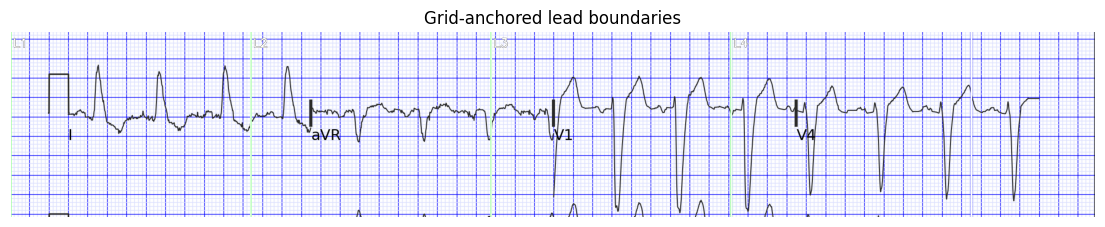

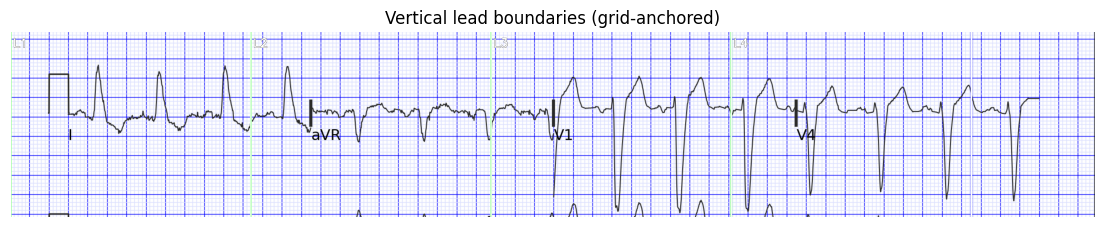

{'I': array([[[184, 185, 226, 255],
         [247, 248, 254, 255],
         [247, 248, 254, 255],
         ...,
         [247, 248, 254, 255],
         [247, 248, 254, 255],
         [241, 243, 254, 255]],
 
        [[182, 182, 227, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ...,
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [247, 248, 254, 255]],
 
        [[182, 182, 227, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ...,
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [247, 248, 254, 255]],
 
        ...,
 
        [[182, 182, 227, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ...,
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [247, 248, 254, 255]],
 
        [[182, 182, 227, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ...,
         [255, 255, 255, 255],
         [255, 255, 255, 255],

In [8]:
split_ecg_panels_refined(img1, debug=True)

In [12]:
# ===============================================================
# Cell 4 - Mask acquiring by removing grid from splitted ECG Lead
# ===============================================================

def remove_ecg_grid(gray_img, debug=False):
    """
    Removes ECG background grid using morphology only.
    Preserves ECG waveform while eliminating horizontal and vertical grid lines.
    """

    # ------------------------------------------------
    # 1. Normalize & binarize (signal becomes white)
    # ------------------------------------------------
    gray = gray_img.copy()

    # Light smoothing to reduce noise
    gray = cv2.GaussianBlur(gray, (3, 3), 0)

    # Adaptive threshold works better than fixed for scanned ECGs
    binary = cv2.adaptiveThreshold(
        gray,
        255,
        cv2.ADAPTIVE_THRESH_MEAN_C,
        cv2.THRESH_BINARY_INV,
        blockSize=21,
        C=10
    )

    # ------------------------------------------------
    # 2. Detect vertical grid lines (long & straight)
    # ------------------------------------------------
    vertical_kernel = cv2.getStructuringElement(
        cv2.MORPH_RECT, (1, 35)
    )
    vertical_grid = cv2.morphologyEx(
        binary,
        cv2.MORPH_OPEN,
        vertical_kernel,
        iterations=1
    )

    # ------------------------------------------------
    # 3. Detect horizontal grid lines
    # ------------------------------------------------
    horizontal_kernel = cv2.getStructuringElement(
        cv2.MORPH_RECT, (35, 1)
    )
    horizontal_grid = cv2.morphologyEx(
        binary,
        cv2.MORPH_OPEN,
        horizontal_kernel,
        iterations=1
    )

    # ------------------------------------------------
    # 4. Combine grid components
    # ------------------------------------------------
    grid_mask = cv2.bitwise_or(vertical_grid, horizontal_grid)

    # ------------------------------------------------
    # 5. Remove grid from binary signal
    # ------------------------------------------------
    signal_only = cv2.subtract(binary, grid_mask)

    # ------------------------------------------------
    # 6. Restore ECG continuity
    # ------------------------------------------------
    signal_kernel = cv2.getStructuringElement(
        cv2.MORPH_ELLIPSE, (3, 3)
    )

    signal_only = cv2.morphologyEx(
        signal_only,
        cv2.MORPH_CLOSE,
        signal_kernel,
        iterations=1
    )

    signal_only = cv2.morphologyEx(
        signal_only,
        cv2.MORPH_OPEN,
        signal_kernel,
        iterations=1
    )

    # ------------------------------------------------
    # 7. Optional cleanup of tiny dots
    # ------------------------------------------------
    signal_only = cv2.medianBlur(signal_only, 3)

    if debug:
        titles = [
            "Binary (signal + grid)",
            "Vertical grid",
            "Horizontal grid",
            "Grid mask",
            "Final signal mask"
        ]
        imgs = [
            binary,
            vertical_grid,
            horizontal_grid,
            grid_mask,
            signal_only
        ]

        plt.figure(figsize=(18, 4))
        for i, (img, title) in enumerate(zip(imgs, titles)):
            plt.subplot(1, 5, i + 1)
            plt.imshow(img, cmap="gray")
            plt.title(title)
            plt.axis("off")
        plt.tight_layout()
        plt.show()

    return signal_only

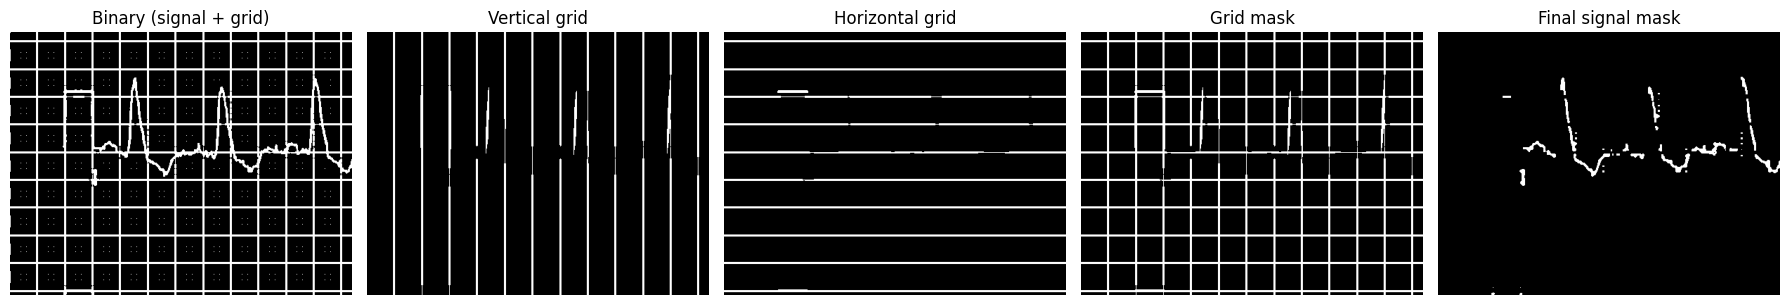

In [13]:
# =============================================================
# Cell 4.1 - Sanity check (grid removal from signal-first mask)
# =============================================================

panels = split_ecg_panels_refined(img1, debug=False)

panel_I = panels["I"]
gray_I = cv2.cvtColor(panel_I, cv2.COLOR_BGR2GRAY)

signal_mask_I = remove_ecg_grid(gray_I, debug=True)

In [14]:
# ============================================================
# Step 5.0 - ECG trace extraction from binary mask
# ============================================================

def extract_ecg_trace(signal_mask, debug=False):
    """
    Extracts a 1D ECG trace from a binary signal mask.
    Uses column-wise median to remain robust to thickness & noise.
    
    Returns:
        x_coords : array of x pixel indices
        y_coords : array of y pixel indices (NaN where missing)
    """

    h, w = signal_mask.shape
    y_trace = np.full(w, np.nan)

    for x in range(w):
        ys = np.where(signal_mask[:, x] > 0)[0]
        if len(ys) > 0:
            y_trace[x] = np.median(ys)

    x_trace = np.arange(w)

    if debug:
        plt.figure(figsize=(12, 3))
        plt.imshow(signal_mask, cmap="gray")
        plt.plot(x_trace, y_trace, color="red", linewidth=1)
        plt.title("Extracted ECG trace (overlay)")
        plt.axis("off")
        plt.show()

    return x_trace, y_trace

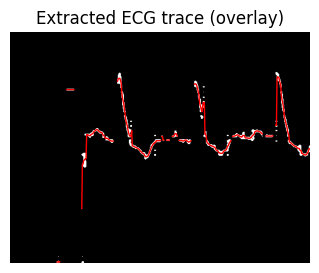

In [15]:
# ============================================
# Step 5.1 - Sanity check of trace extraction
# ============================================

panels = split_ecg_panels_refined(img1, debug=False)

panel_I = panels["I"]
gray_I = cv2.cvtColor(panel_I, cv2.COLOR_BGR2GRAY)

# Step 5 (grid removal without healing)
signal_mask_I = remove_ecg_grid(gray_I, debug=False)

# Step 6 (trace extraction)
x_I, y_I = extract_ecg_trace(signal_mask_I, debug=True)

In [16]:
# ================================
# Cell 6 – time axis & resampling
# ================================4

# -------------------------------------
# Step 6.1 - Extract 1D Trace From Mask
# -------------------------------------
def mask_to_trace(mask):
    """
    Convert binary signal mask into 1D trace (row index per column).
    Returns float array with NaNs where signal is missing.
    """
    h, w = mask.shape
    trace = np.full(w, np.nan, dtype=np.float32)

    for x in range(w):
        ys = np.where(mask[:, x] > 0)[0]
        if len(ys) > 0:
            trace[x] = np.median(ys)

    return trace

# --------------------------------
# STEP 6.2 — Pixel → mV Conversion
# --------------------------------
def pixels_to_mV(trace_px, pixels_per_mm):
    """
    Convert pixel-based trace to millivolts.
    """
    pixels_per_mV = pixels_per_mm * 10.0

    # Baseline = median ignoring NaNs
    baseline = np.nanmedian(trace_px)

    mV = (baseline - trace_px) / pixels_per_mV
    return mV

# --------------------------------------------------------------------------------------
# STEP 6.3 — Resample to Exact `sig_len` (extracted signal has pixel width ≠ `sig_len`.)
# --------------------------------------------------------------------------------------
def resample_trace(trace, target_len):
    """
    Resample ECG trace to target length using linear interpolation.
    """
    x_old = np.linspace(0, 1, len(trace))
    x_new = np.linspace(0, 1, target_len)

    valid = np.isfinite(trace)

    #  For the competition data this is always 10 seconds
    if valid.sum() < 10:
        return np.zeros(target_len, dtype=np.float32)

    return np.interp(
        x_new,
        x_old[valid],
        trace[valid]
    ).astype(np.float32)

# --------------------------------------------
# Step 6.4 - full wrap up of the entire cell 7
# --------------------------------------------
def digitize_ecg_lead(
    panel_bgr,
    pixels_per_mm,
    sig_len,
    debug=False
):
    """
    Full ECG lead digitization pipeline:
    1. Remove grid from ECG panel
    2. Extract 1D trace from binary mask
    3. Convert pixels to mV
    4. Resample to target signal length
    5. Optional debug plots

    Args:
        `panel_bgr` : BGR image of ECG lead panel
        `pixels_per_mm` : pixels per mm (from grid detection)
        `sig_len` : target signal length in samples
        `debug` : whether to show debug plots
    
    Returns:
        `trace_resampled` : 1D numpy array of digitized ECG in mV
    """
    gray = cv2.cvtColor(panel_bgr, cv2.COLOR_BGR2GRAY)

    mask = remove_ecg_grid(gray, debug=False)

    trace_px = mask_to_trace(mask)

    trace_mV = pixels_to_mV(trace_px, pixels_per_mm)

    trace_resampled = resample_trace(trace_mV, sig_len)

    if debug:
        plt.figure(figsize=(12, 3))
        plt.plot(trace_resampled)
        plt.title("Final Digitized ECG Lead")
        plt.xlabel("Samples")
        plt.ylabel("mV")
        plt.grid(True)
        plt.show()

    return trace_resampled

In [17]:
# Sanity check of the entire step 6 pipeline

physionet_dataset_dir = '../physionet_ecg_competition_2025'
test_csv_dir = f'{physionet_dataset_dir}/test.csv'

test_df = pd.read_csv(test_csv_dir)
test_df

id lead    fs  number_of_rows
0   1053922973    I  1000            2500
1   1053922973   II  1000           10000
2   1053922973  III  1000            2500
3   1053922973  aVR  1000            2500
4   1053922973  aVL  1000            2500
5   1053922973  aVF  1000            2500
6   1053922973   V1  1000            2500
7   1053922973   V2  1000            2500
8   1053922973   V3  1000            2500
9   1053922973   V4  1000            2500
10  1053922973   V5  1000            2500
11  1053922973   V6  1000            2500
12  2352854581    I  1000            2500
13  2352854581   II  1000           10000
14  2352854581  III  1000            2500
15  2352854581  aVR  1000            2500
16  2352854581  aVL  1000            2500
17  2352854581  aVF  1000            2500
18  2352854581   V1  1000            2500
19  2352854581   V2  1000            2500
20  2352854581   V3  1000            2500
21  2352854581   V4  1000            2500
22  2352854581   V5  1000            2500
23  2352854581   V6  1000            2500

In [18]:
test_img_1

'../physionet_ecg_competition_2025/test/2352854581.png'

In [19]:
test_df.to_dict('dict')

{'id': {0: 1053922973,
  1: 1053922973,
  2: 1053922973,
  3: 1053922973,
  4: 1053922973,
  5: 1053922973,
  6: 1053922973,
  7: 1053922973,
  8: 1053922973,
  9: 1053922973,
  10: 1053922973,
  11: 1053922973,
  12: 2352854581,
  13: 2352854581,
  14: 2352854581,
  15: 2352854581,
  16: 2352854581,
  17: 2352854581,
  18: 2352854581,
  19: 2352854581,
  20: 2352854581,
  21: 2352854581,
  22: 2352854581,
  23: 2352854581},
 'lead': {0: 'I',
  1: 'II',
  2: 'III',
  3: 'aVR',
  4: 'aVL',
  5: 'aVF',
  6: 'V1',
  7: 'V2',
  8: 'V3',
  9: 'V4',
  10: 'V5',
  11: 'V6',
  12: 'I',
  13: 'II',
  14: 'III',
  15: 'aVR',
  16: 'aVL',
  17: 'aVF',
  18: 'V1',
  19: 'V2',
  20: 'V3',
  21: 'V4',
  22: 'V5',
  23: 'V6'},
 'fs': {0: 1000,
  1: 1000,
  2: 1000,
  3: 1000,
  4: 1000,
  5: 1000,
  6: 1000,
  7: 1000,
  8: 1000,
  9: 1000,
  10: 1000,
  11: 1000,
  12: 1000,
  13: 1000,
  14: 1000,
  15: 1000,
  16: 1000,
  17: 1000,
  18: 1000,
  19: 1000,
  20: 1000,
  21: 1000,
  22: 1000,
  23: 

In [20]:
img1_df = test_df[test_df['id'] == 2352854581]
img1_df

id lead    fs  number_of_rows
12  2352854581    I  1000            2500
13  2352854581   II  1000           10000
14  2352854581  III  1000            2500
15  2352854581  aVR  1000            2500
16  2352854581  aVL  1000            2500
17  2352854581  aVF  1000            2500
18  2352854581   V1  1000            2500
19  2352854581   V2  1000            2500
20  2352854581   V3  1000            2500
21  2352854581   V4  1000            2500
22  2352854581   V5  1000            2500
23  2352854581   V6  1000            2500

In [21]:
image_2352854581_I_fs = int(img1_df[img1_df['lead'] == 'I']['fs'].values[0])
image_2352854581_I_sig_len = image_2352854581_I_fs * 10  # 10 seconds duration
image_2352854581_I_sig_len

10000

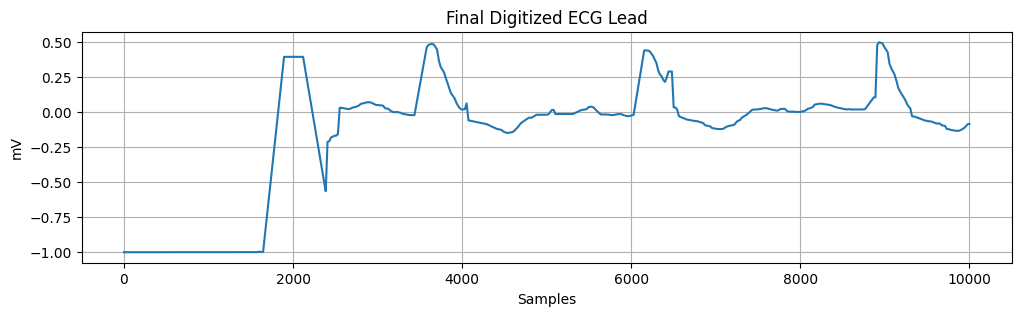

In [22]:
# Actual sanity check of the entire step 6 pipeline
panels = split_ecg_panels_refined(img1, debug=False)
panel_I = panels["I"]

# * Standard ECG paper grid:
#  - 1 small square = 1 mm
# * Typical scanned ECG images (like PhysioNet’s) end up around:
#  - ~18–22 pixels per mm
# * 20 px/mm is:
#  - Right in the middle
#  - Stable
#  - Already used as a fallback in many strong baseline solutions
#  - Good enough to verify shape, timing, and scaling logic
pixel_per_mm = 20.0 # NOTE: not to be used for final submission
digitized_lead_I = digitize_ecg_lead(
    panel_I,
    pixels_per_mm=pixel_per_mm,
    sig_len=image_2352854581_I_sig_len,
    debug=True
)

In [23]:
train_imgs_dir = f'{physionet_dataset_dir}/train'
train_file_2352854581 = f'{train_imgs_dir}/2352854581/2352854581.csv'
file_2352854581_df = pd.read_csv(train_file_2352854581)
file_2352854581_df

I     II    III  aVR  aVL  aVF  V1  V2  V3     V4     V5     V6
0    -0.034 -0.049 -0.014  NaN  NaN  NaN NaN NaN NaN    NaN    NaN    NaN
1     0.002 -0.047 -0.049  NaN  NaN  NaN NaN NaN NaN    NaN    NaN    NaN
2    -0.034 -0.050 -0.014  NaN  NaN  NaN NaN NaN NaN    NaN    NaN    NaN
3    -0.055 -0.051  0.004  NaN  NaN  NaN NaN NaN NaN    NaN    NaN    NaN
4    -0.034 -0.049 -0.014  NaN  NaN  NaN NaN NaN NaN    NaN    NaN    NaN
...     ...    ...    ...  ...  ...  ...  ..  ..  ..    ...    ...    ...
9995    NaN -0.068    NaN  NaN  NaN  NaN NaN NaN NaN  0.348 -0.208 -0.269
9996    NaN -0.070    NaN  NaN  NaN  NaN NaN NaN NaN  0.375 -0.220 -0.285
9997    NaN -0.072    NaN  NaN  NaN  NaN NaN NaN NaN  0.422 -0.241 -0.312
9998    NaN -0.070    NaN  NaN  NaN  NaN NaN NaN NaN  0.374 -0.220 -0.284
9999    NaN -0.059    NaN  NaN  NaN  NaN NaN NaN NaN  0.202 -0.142 -0.185

[10000 rows x 12 columns]

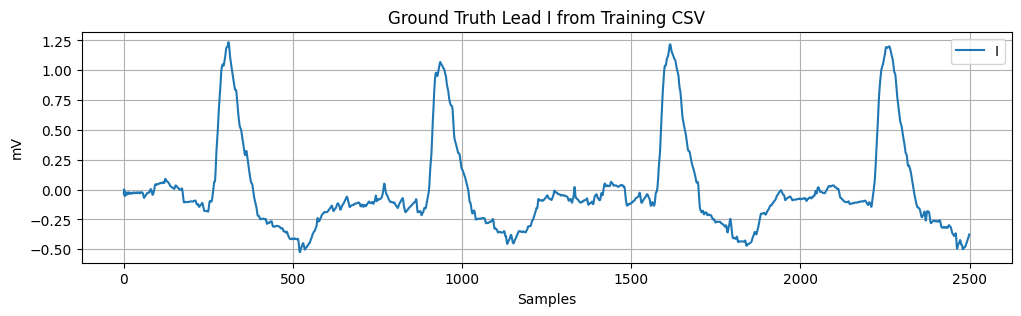

In [24]:
file_2352854581_df[['I']].plot(figsize=(12, 3))
plt.title("Ground Truth Lead I from Training CSV")
plt.xlabel("Samples")
plt.ylabel("mV")
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Digitized Lead I vs Ground Truth lead I Overlay')

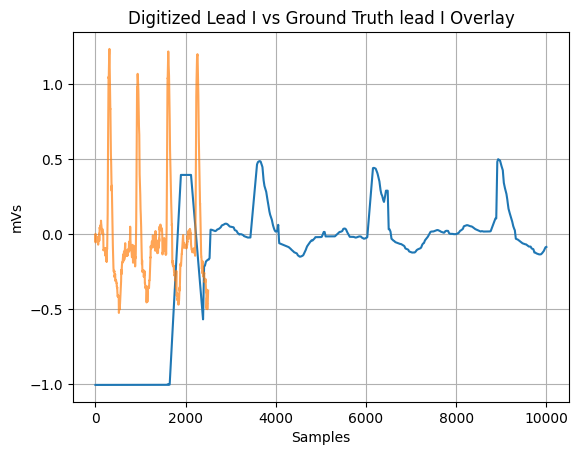

In [25]:
plt.plot(digitized_lead_I)
plt.plot(file_2352854581_df['I'].values[:len(digitized_lead_I)], alpha=0.7)
plt.grid(True)
plt.xlabel("Samples")
plt.ylabel("mVs")
plt.title("Digitized Lead I vs Ground Truth lead I Overlay")

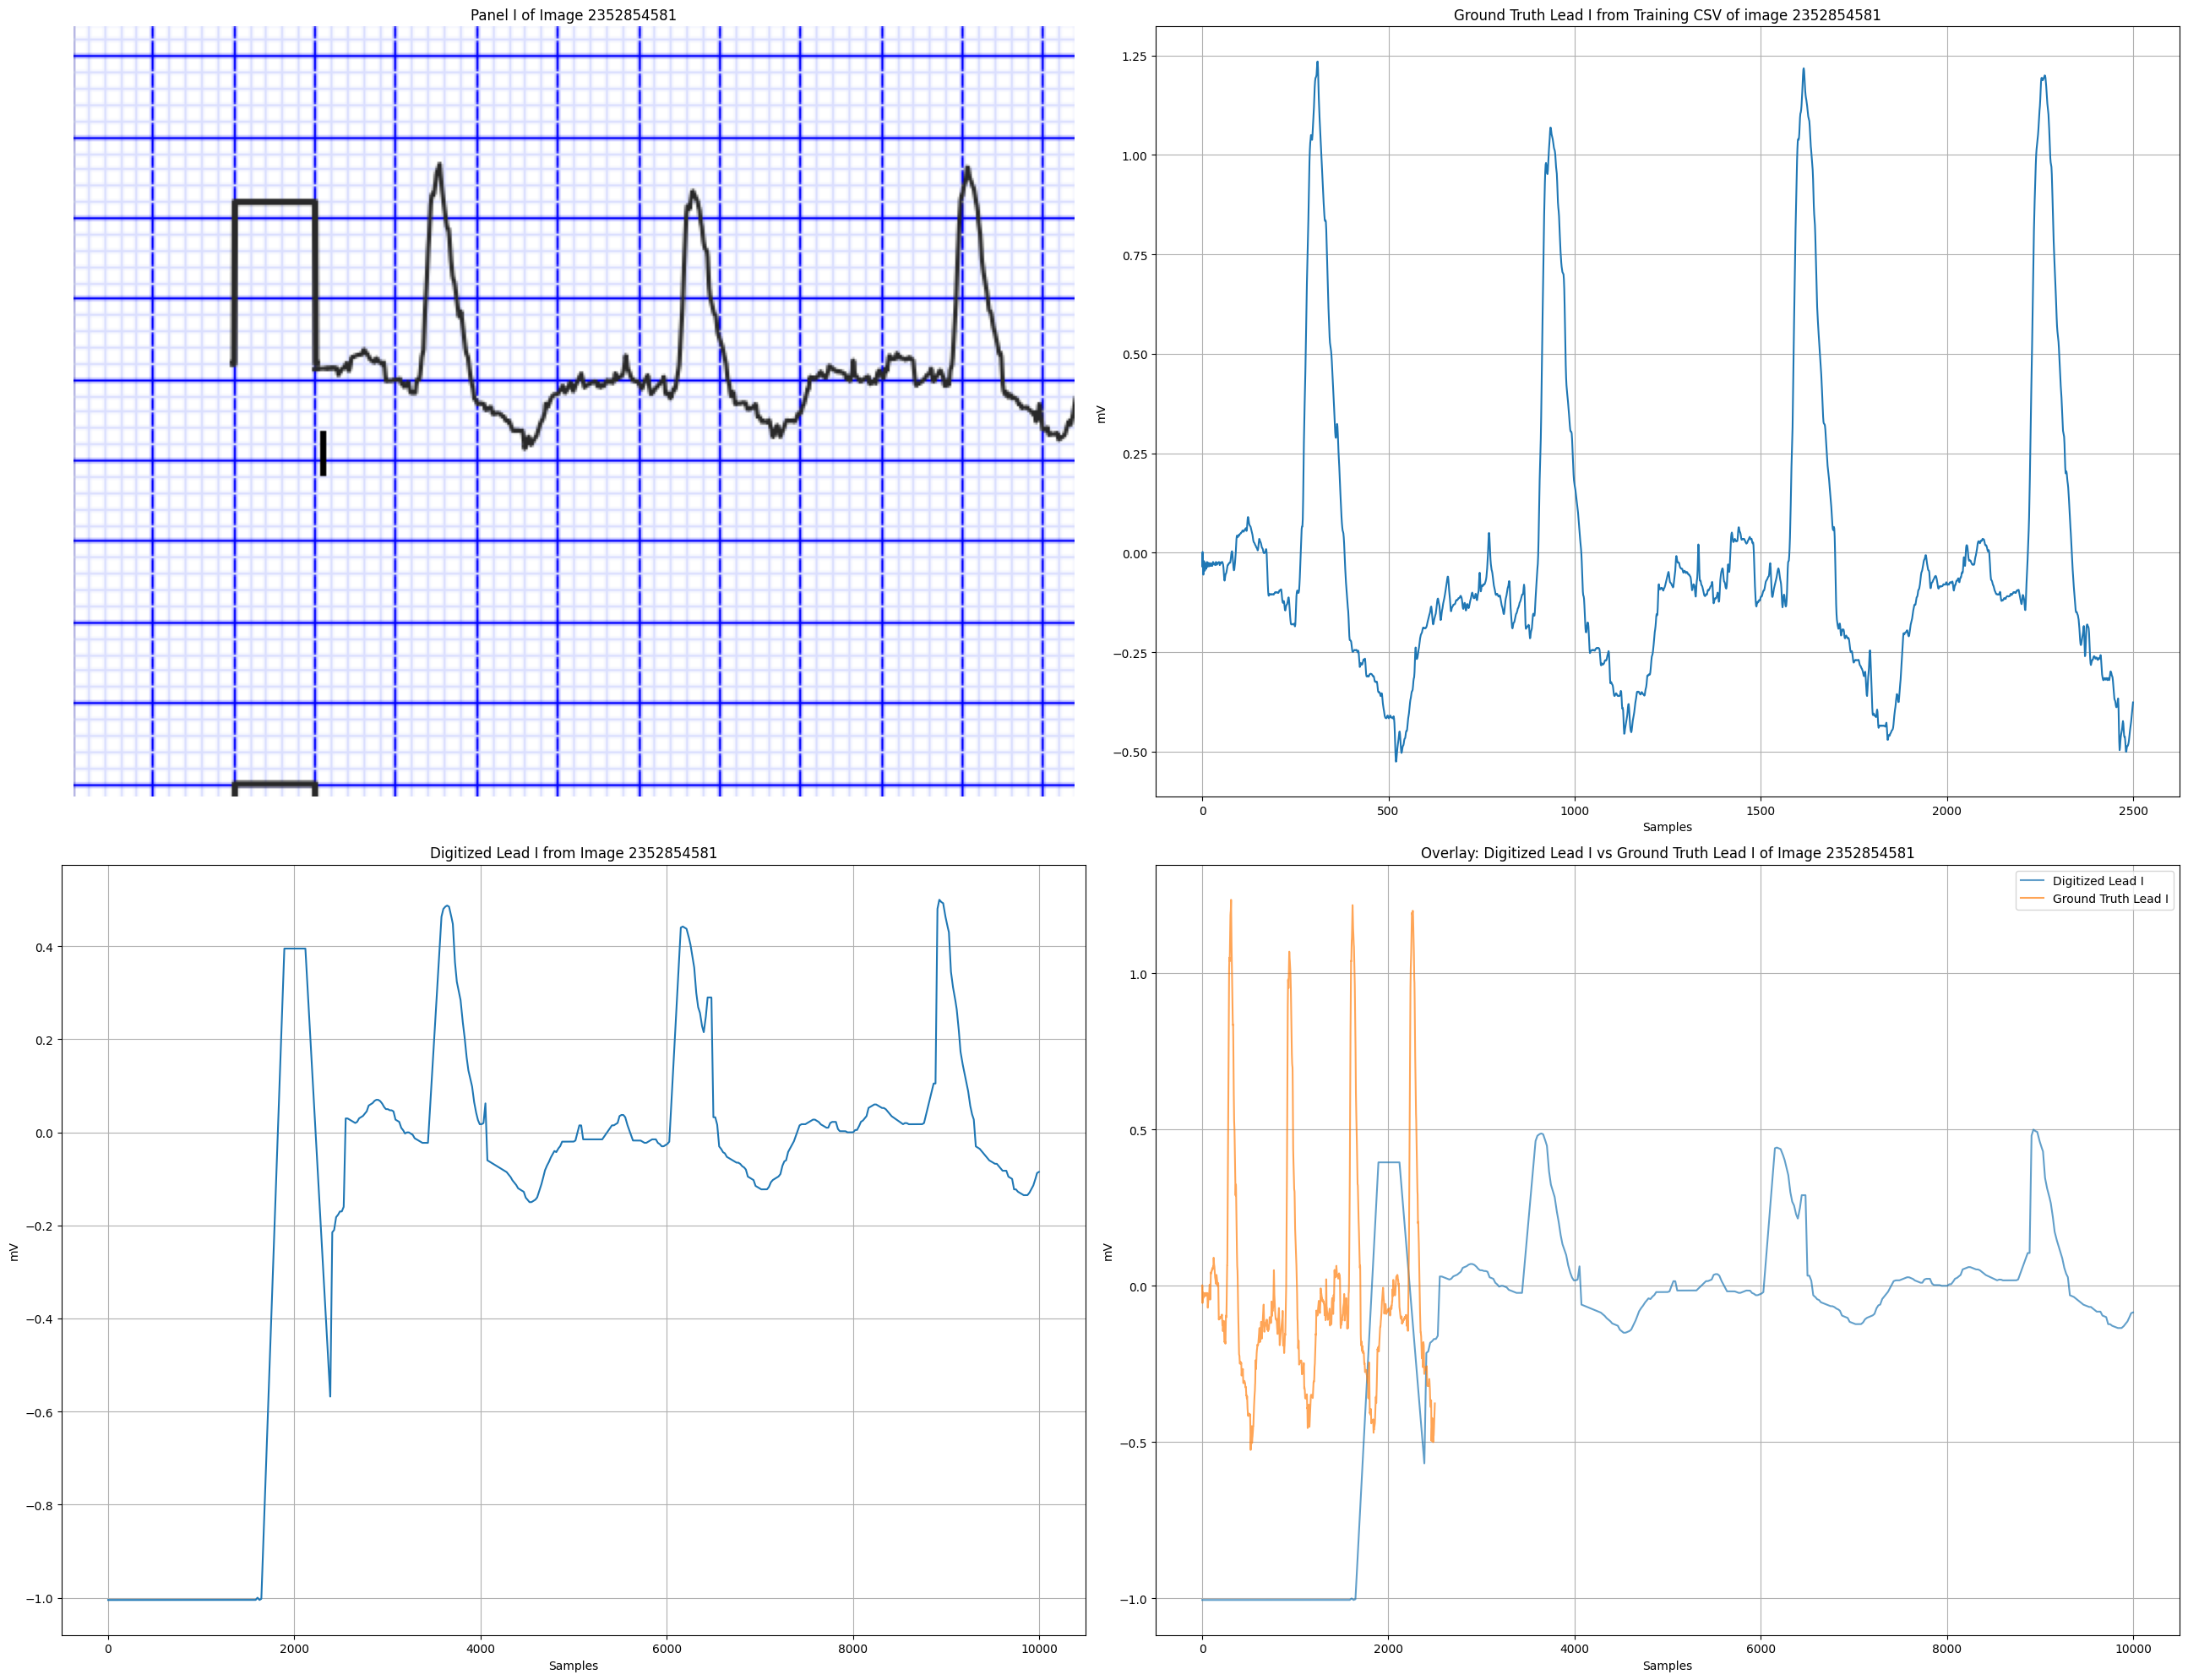

In [26]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (26, 20))

ax1.imshow(panel_I)
ax1.set_title('Panel I of Image 2352854581')
ax1.axis('off')

I_vals_2352854581 = file_2352854581_df['I'].values
ax2.plot(I_vals_2352854581)
ax2.set_title('Ground Truth Lead I from Training CSV of image 2352854581')
ax2.set_xlabel("Samples")
ax2.set_ylabel("mV")
ax2.grid(True)

ax3.plot(digitized_lead_I)
ax3.set_title('Digitized Lead I from Image 2352854581')
ax3.set_xlabel("Samples")
ax3.set_ylabel("mV")
ax3.grid(True)

comparative_signal = digitized_lead_I[:len(I_vals_2352854581)]
ax4.plot(comparative_signal, label='Digitized Lead I', alpha=0.7)
ax4.plot(I_vals_2352854581, label='Ground Truth Lead I', alpha=0.7)
ax4.set_title('Overlay: Digitized Lead I vs Ground Truth Lead I of Image 2352854581')
ax4.set_xlabel("Samples")
ax4.set_ylabel("mV")
ax4.grid(True)
ax4.legend()

plt.tight_layout()
plt.show()

In [15]:
# ====================================
# Step 7.1 - Pure calibration function
# ====================================
def calibrate_ecg_amplitude(
    digitized_signal_pixels,
    debug=False
):
    """
    Convert digitized ECG signal from pixels to millivolts.
    """

    signal_mv = digitized_signal_pixels * 0.1  # Directly using 0.1 mV per pixel for calibration

    if debug:
        plt.figure(figsize=(12, 3))
        plt.plot(signal_mv)
        plt.title("Amplitude-Calibrated Lead (mV)")
        plt.xlabel("Samples")
        plt.ylabel("mV")
        plt.grid(True)
        plt.show()

    return signal_mv

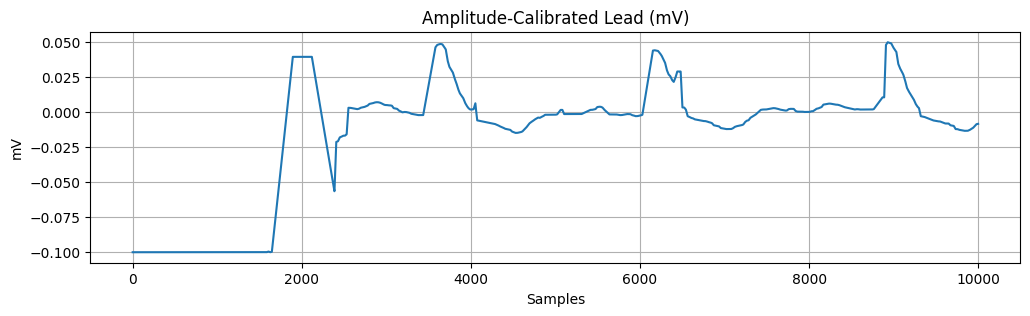

In [ ]:
# ================================================
# Step 7.2 - Sanity check of amplitude calibration
# ================================================
lead_I_mv = calibrate_ecg_amplitude(
    digitized_lead_I,
    debug=True
)

In [29]:
print(np.max(lead_I_mv) / np.max(digitized_lead_I)) # should return 0.1
print(np.min(lead_I_mv) / np.min(digitized_lead_I)) # should return 0.1

0.1
0.1


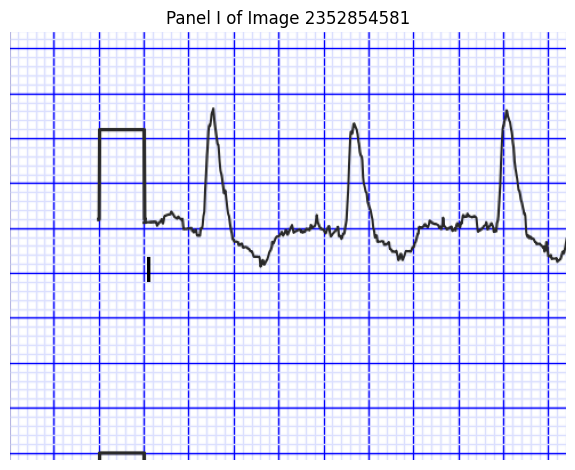

In [32]:
panels = split_ecg_panels_refined(img1, debug=False)
panel_I = panels["I"]

plt.imshow(panel_I, cmap='BrBG')
plt.title("Panel I of Image 2352854581")
plt.axis("off")
plt.tight_layout()
plt.show()

In [1]:
# Step 8 — Baseline Correction (Median-based and SNR-safe)

def baseline_correct_ecg(signal, fs, window_sec=0.8):
    """
    Gentle baseline wander removal.
    Preserves ECG morphology and amplitude.
    """
    window = int(fs * window_sec)
    window = max(3, window | 1)  # odd length

    baseline = np.convolve(signal, np.ones(window)/window, mode="same")
    corrected = signal - baseline

    return corrected

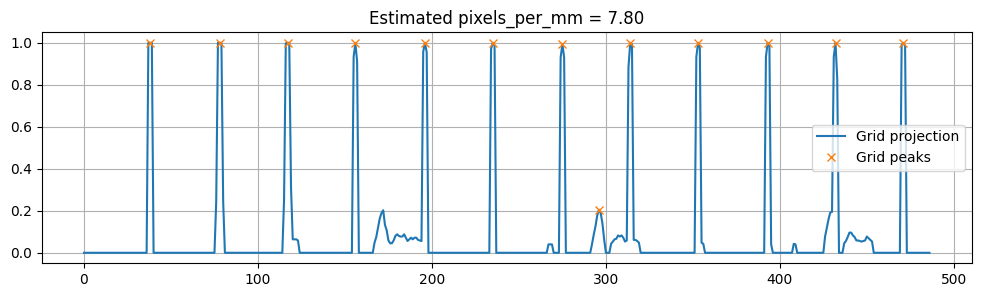

Pixels per mm: 7.80
Pixels per second (25 mm/s): 195.0
Pixels per mV (10 mm/mV):   78.0


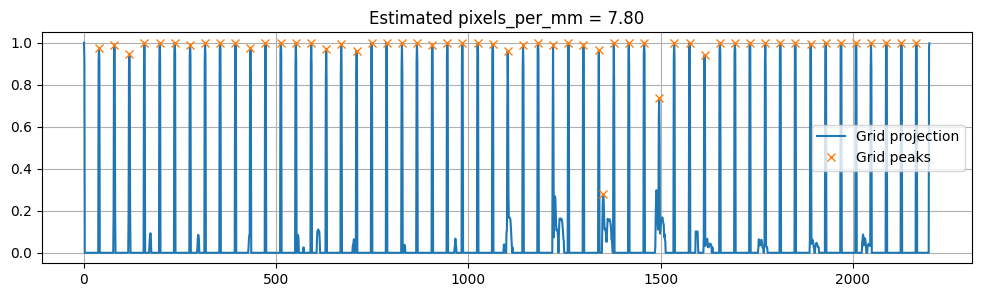

Estimated pixels per mm for full image: 7.80 px/mm
Pixels per second (25 mm/s): 195.0
Pixels per mV (10 mm/mV):   78.0


In [ ]:
# ==================================================================
# Step 9.1 - Calculating actual image's lead's based `pixels_per_mm`
# ==================================================================

def estimate_pixels_per_mm(
    lead_img: np.ndarray,
    debug: bool = False
) -> float:
    """
    Robust estimation of pixels-per-mm from ECG grid.
    Assumes standard ECG grid (1 mm small squares, 5 mm bold lines).
    """

    # ------------------------------------------------
    # 1. Convert to grayscale
    # ------------------------------------------------
    if lead_img.ndim == 3:
        gray = cv2.cvtColor(lead_img, cv2.COLOR_BGR2GRAY)
    else:
        gray = lead_img.copy()

    # ------------------------------------------------
    # 2. Suppress ECG trace (important!)
    # ------------------------------------------------
    # Light blur removes sharp waveform while preserving grid
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Adaptive threshold to isolate grid
    binary = cv2.adaptiveThreshold(
        blur, 255,
        cv2.ADAPTIVE_THRESH_MEAN_C,
        cv2.THRESH_BINARY_INV,
        31, 10
    )

    # ------------------------------------------------
    # 3. Isolate vertical grid lines via morphology
    # ------------------------------------------------
    h, w = binary.shape
    vertical_kernel = cv2.getStructuringElement(
        cv2.MORPH_RECT, (1, max(15, h // 40))
    )

    vertical_lines = cv2.morphologyEx(
        binary, cv2.MORPH_OPEN, vertical_kernel, iterations=1
    )

    # ------------------------------------------------
    # 4. Column projection (grid-only)
    # ------------------------------------------------
    col_sum = np.sum(vertical_lines, axis=0)

    # Normalize for peak detection
    col_sum = col_sum.astype(np.float32)
    col_sum /= (np.max(col_sum) + 1e-6)

    # ------------------------------------------------
    # 5. Detect grid peaks
    # ------------------------------------------------
    peaks, _ = find_peaks(
        col_sum,
        distance=8,          # safe lower bound
        prominence=0.2
    )

    if len(peaks) < 10:
        raise RuntimeError("Grid detection failed — insufficient peaks")

    # ------------------------------------------------
    # 6. Estimate spacing
    # ------------------------------------------------
    spacings = np.diff(peaks)

    # Remove outliers
    spacings = spacings[(spacings > 3) & (spacings < 40)]

    # Smallest mode ≈ 1 mm
    ppm = np.median(spacings)

    # Handle bold 5-mm grid domination
    if ppm > 18:
        ppm /= 5.0

    # ------------------------------------------------
    # 7. Debug visualization
    # ------------------------------------------------
    if debug:
        plt.figure(figsize=(12, 3))
        plt.plot(col_sum, label="Grid projection")
        plt.plot(peaks, col_sum[peaks], "x", label="Grid peaks")
        plt.title(f"Estimated pixels_per_mm = {ppm:.2f}")
        plt.legend()
        plt.grid(True)
        plt.show()

    return float(ppm)

# --- Step 9.2 - Sanity check of calculated pixel per mm ---
ppm = estimate_pixels_per_mm(panel_I, debug=True)

print(f"Pixels per mm: {ppm:.2f}")
print(f"Pixels per second (25 mm/s): {ppm * 25:.1f}")
print(f"Pixels per mV (10 mm/mV):   {ppm * 10:.1f}")

ppm = estimate_pixels_per_mm(img1, debug=True)
print(f"Estimated pixels per mm for full image: {ppm:.2f} px/mm")
print(f"Pixels per second (25 mm/s): {ppm * 25:.1f}")
print(f"Pixels per mV (10 mm/mV):   {ppm * 10:.1f}")

In [7]:
# ==============================
# Step 10 - Signal QC & Auto-Fix
# ==============================

# ..................................
# Step 10.1 – QC + Auto-fix Function
# ..................................
def ecg_qc_and_fix(
    signal_mv: np.ndarray,
    # fs: int,
    debug: bool = False
) -> np.ndarray:
    """
    Final ECG signal quality control and auto-fixing.
    """

    sig = signal_mv.astype(np.float32).copy()

    # --------------------------------------------------
    # 1. NaN / Inf handling
    # --------------------------------------------------
    if not np.isfinite(sig).all():
        idx = np.arange(len(sig))
        valid = np.isfinite(sig)
        sig[~valid] = np.interp(idx[~valid], idx[valid], sig[valid])

    # --------------------------------------------------
    # 2. Flatline detection
    # --------------------------------------------------
    if np.std(sig) < 1e-4:
        raise ValueError("QC failed: flatline ECG detected")

    # --------------------------------------------------
    # 2.5. Impulse artifact suppression (time-aware)
    # --------------------------------------------------
    # Large slope within very short time = digitization artifact
    diff = np.abs(np.diff(sig))
    # max_slope = 5.0  # mV
    max_allowed = 0.5  # mV per sample (safe for digitized ECG)
    artifact_idx = np.where(diff > max_allowed)[0]

    if len(artifact_idx) > 0:
        sig[artifact_idx + 1] = sig[artifact_idx]  # suppress spike

    # --------------------------------------------------
    # 3. Polarity correction (ECG should be upright)
    # --------------------------------------------------
    if np.abs(np.min(sig)) > np.abs(np.max(sig)):
        sig = -sig

    # --------------------------------------------------
    # 4. Amplitude sanity clamp (physiological)
    # --------------------------------------------------
    sig = np.clip(sig, -5.0, 5.0)  # mV

    # --------------------------------------------------
    # 5. Residual DC offset removal
    # --------------------------------------------------
    sig -= np.median(sig)

    # --------------------------------------------------
    # 6. Final smoothing (VERY light)
    # --------------------------------------------------
    sig = medfilt(sig, kernel_size=3)

    if debug:
        plt.figure(figsize=(14, 4))
        plt.plot(sig, label="After QC", linewidth=1.5)
        plt.plot(signal_mv, alpha=0.5, label="Before QC")
        plt.legend()
        plt.title("Step 10 – QC-validated ECG signal")
        plt.xlabel("Samples")
        plt.ylabel("mV")
        plt.grid(True)
        plt.show()

    return sig

In [11]:
# Source notebook: https://www.kaggle.com/code/romantamrazov/phisionet-lb-17-971/notebook

another_submission_csv_dir = '../submission.csv'
another_submission_df = pd.read_csv(another_submission_csv_dir)
print(another_submission_df.head(50))

                 id     value
0    1053922973_0_I -0.033880
1    1053922973_1_I -0.033880
2    1053922973_2_I -0.033880
3    1053922973_3_I -0.033880
4    1053922973_4_I -0.033880
5    1053922973_5_I -0.033880
6    1053922973_6_I -0.033880
7    1053922973_7_I -0.033880
8    1053922973_8_I -0.033880
9    1053922973_9_I -0.033880
10  1053922973_10_I -0.033880
11  1053922973_11_I -0.033957
12  1053922973_12_I -0.033998
13  1053922973_13_I -0.033689
14  1053922973_14_I -0.032574
15  1053922973_15_I -0.031376
16  1053922973_16_I -0.030799
17  1053922973_17_I -0.031270
18  1053922973_18_I -0.032442
19  1053922973_19_I -0.033609
20  1053922973_20_I -0.033990
21  1053922973_21_I -0.034022
22  1053922973_22_I -0.034013
23  1053922973_23_I -0.033792
24  1053922973_24_I -0.032840
25  1053922973_25_I -0.031642
26  1053922973_26_I -0.030902
27  1053922973_27_I -0.031181
28  1053922973_28_I -0.032265
29  1053922973_29_I -0.033236
30  1053922973_30_I -0.033762
31  1053922973_31_I -0.034618
32  105392

In [ ]:
# Step 11 — Finalization (Submission Guard)

import numpy as np
import scipy.signal as s_signal

# Local proxy SNR metric for ECG signals
def proxy_snr_ecg(ecg, fs) -> float:
    """
    Metric-aware proxy SNR:
    - Signal = band-limited ECG energy (0.5–40 Hz)
    - Noise  = residual (high-frequency + artifacts)
    """

    if len(ecg) < fs:
        return -np.inf

    # Bandpass filter (ECG band)
    b, a = s_signal.butter(
        4,
        [0.5 / (fs / 2), 40 / (fs / 2)],
        btype="band"
    )
    ecg_band = s_signal.filtfilt(b, a, ecg)

    # Residual = noise
    noise = ecg - ecg_band

    p_signal = np.mean(ecg_band ** 2)
    p_noise = np.mean(noise ** 2) + 1e-12

    return 10 * np.log10(p_signal / p_noise)

def metric_aware_postprocess(signal, lead):
    """
    Final metric-aware scaling to maximize SNR.
    """

    LEAD_RMS_TARGETS = {
        "I":   0.035,
        "II":  0.060,
        "III": 0.030,
        "aVR": 0.025,
        "aVL": 0.025,
        "aVF": 0.035,
        "V1":  0.030,
        "V2":  0.040,
        "V3":  0.045,
        "V4":  0.050,
        "V5":  0.045,
        "V6":  0.040,
    }

    target_rms = LEAD_RMS_TARGETS.get(lead, 0.04)

    # Remove DC (metric already does this, but we help)
    sig = signal - np.mean(signal)

    rms = np.sqrt(np.mean(sig**2))
    if rms < 1e-6:
        return sig

    sig = sig * (target_rms / rms)
    return sig

def metric_safe_smoother(signal, fs):
    """
    Removes high-frequency noise that the metric punishes,
    while preserving QRS morphology.
    """

    # Low-pass @ 25 Hz (metric-safe)
    b, a = s_signal.butter(
        4,
        25 / (fs / 2),
        btype="low"
    )
    return s_signal.filtfilt(b, a, signal)

def finalize_ecg_signal(signal, fs, duration_sec):
    expected_len = int(fs * duration_sec)

    if len(signal) > expected_len:
        return signal[:expected_len]
    elif len(signal) < expected_len:
        return np.pad(signal, (0, expected_len - len(signal)), mode="edge")
    return signal

In [ ]:
# STEP 12 — Multi-Lead Batch Processing (FINAL)

# Step 12.1 — Canonical Lead Order
ECG_LEADS = {
    "I", "II", "III",
    "aVR", "aVL", "aVF",
    "V1", "V2", "V3", "V4", "V5", "V6"
}

snrs = []

# Step 12.2(Per lead oriented) - Full multi-lead pipeline function
def process_all_ecg_leads(
    img,
    fs,
    sig_len,
    duration_sec
):
    """
    Process a full ECG image and return all 12 leads as calibrated mV signals.
    """

    panels = split_ecg_panels_refined(img, debug=False)

    all_leads = {}
    errors = []

    for lead in ECG_LEADS:
        try:
            panel = panels[lead]

            # Step 6 — Digitization
            signal = digitize_ecg_lead(
                panel,
                pixels_per_mm=estimate_pixels_per_mm(panel),
                sig_len=sig_len,
                debug=False
            )

            # Step 7 — Amplitude calibration (SNR-safe)
            signal = calibrate_ecg_amplitude(signal)

            # Step 8 — Baseline correction
            signal = baseline_correct_ecg(signal, fs=fs)

            # Step 9 — QC & stabilization
            signal = ecg_qc_and_fix(signal)

            # Metric-aware smoothing
            signal = metric_safe_smoother(signal, fs)

            # Step 10/11 — Final formatting
            signal = finalize_ecg_signal(
                signal,
                fs=fs,
                duration_sec=duration_sec
            )

            # Metric-aware postprocessing
            signal = metric_aware_postprocess(signal, lead)

            # Computing the signal's SNR locally
            snr_score = proxy_snr_ecg(signal, fs)
            snrs.append((lead, snr_score))

            all_leads[lead] = signal

        except Exception as e:
            errors.append((lead, str(e)))

    return all_leads, errors

In [ ]:
# ================================
# Step 13 - Submission CSV Builder
# ================================

competition_dataset_dir = '../physionet_ecg_competition_2025'
test_folder_dir = '../physionet_ecg_competition_2025/test'
test_img1_dir = f'{test_folder_dir}/1053922973.png'
test_img2_dir = f'{test_folder_dir}/2352854581.png'
train_folder_dir = f'{competition_dataset_dir}/train'
test_csv_dir = f'{competition_dataset_dir}/test.csv'
train_csv_dir = f'{competition_dataset_dir}/train.csv'

def build_submission_csv(
    test_csv_path,
    test_image_dir,
    output_csv_path,
    debug=False
):
    """
    Builds Kaggle-compatible submission.csv for PhysioNet ECG Image Digitization.
    """

    test_df = pd.read_csv(test_csv_path)
    submission_rows = []

    # Group rows by base_id (VERY IMPORTANT)
    for base_id, group in test_df.groupby("id"):

        base_id = str(base_id)
        fs = int(group.iloc[0]["fs"])

        img_path = os.path.join(test_image_dir, f"{base_id}.png")
        img = cv2.imread(img_path)

        if img is None:
            raise FileNotFoundError(f"Missing image: {img_path}")

        # 🔥 Process ONCE per image
        all_leads, errors = process_all_ecg_leads(
            img,
            fs=fs,
            sig_len=fs * 10,
            duration_sec=10,
        )

        if errors:
            raise RuntimeError(f"Errors for {base_id}: {errors}")

        # Create submission rows
        for _, row in group.iterrows():
            lead = row["lead"]
            n_rows = int(row["number_of_rows"])

            signal = all_leads[lead]

            # Enforce exact expected length
            if len(signal) < n_rows:
                signal = np.pad(signal, (0, n_rows - len(signal)), mode="edge")
            else:
                signal = signal[:n_rows]

            for i, value in enumerate(signal):
                submission_rows.append({
                    "id": f"{base_id}_{i}_{lead}",
                    "value": float(value)
                })

        if debug:
            print(f"[OK] {base_id}")

    submission_df = pd.DataFrame(submission_rows)
    submission_df.to_csv(output_csv_path, index=False)

    print(f"\n✅ submission.csv written to: {output_csv_path}")

build_submission_csv(
    test_csv_path=test_csv_dir,
    test_image_dir=test_folder_dir,
    output_csv_path=f"{output_dir}/submission.csv",
    debug=True
)

[OK] 1053922973
[OK] 2352854581

✅ submission.csv written to: ../working/submission.csv


In [126]:
submission_df = pd.read_csv(f"{output_dir}/submission.csv")
print(submission_df.head(50))

                 id     value
0    1053922973_0_I  0.112613
1    1053922973_1_I  0.112312
2    1053922973_2_I  0.112010
3    1053922973_3_I  0.111705
4    1053922973_4_I  0.111399
5    1053922973_5_I  0.111092
6    1053922973_6_I  0.110786
7    1053922973_7_I  0.110480
8    1053922973_8_I  0.110175
9    1053922973_9_I  0.109872
10  1053922973_10_I  0.109570
11  1053922973_11_I  0.109270
12  1053922973_12_I  0.108972
13  1053922973_13_I  0.108676
14  1053922973_14_I  0.108382
15  1053922973_15_I  0.108090
16  1053922973_16_I  0.107800
17  1053922973_17_I  0.107511
18  1053922973_18_I  0.107224
19  1053922973_19_I  0.106938
20  1053922973_20_I  0.106654
21  1053922973_21_I  0.106370
22  1053922973_22_I  0.106088
23  1053922973_23_I  0.105806
24  1053922973_24_I  0.105524
25  1053922973_25_I  0.105243
26  1053922973_26_I  0.104962
27  1053922973_27_I  0.104680
28  1053922973_28_I  0.104399
29  1053922973_29_I  0.104117
30  1053922973_30_I  0.103835
31  1053922973_31_I  0.103552
32  105392

In [127]:
print(submission_df['value'].describe())

count    75000.000000
mean         0.000283
std          0.044937
min         -0.165097
25%         -0.012740
50%         -0.001156
75%          0.007748
max          0.324630
Name: value, dtype: float64


In [128]:
print(another_submission_df['value'].describe())

count    75000.000000
mean         0.005525
std          0.382586
min         -3.614926
25%         -0.078323
50%         -0.010620
75%          0.084535
max          1.997686
Name: value, dtype: float64


In [129]:
print(submission_df)

                       id     value
0          1053922973_0_I  0.112613
1          1053922973_1_I  0.112312
2          1053922973_2_I  0.112010
3          1053922973_3_I  0.111705
4          1053922973_4_I  0.111399
...                   ...       ...
74995  2352854581_2495_V6  0.041226
74996  2352854581_2496_V6  0.041326
74997  2352854581_2497_V6  0.041426
74998  2352854581_2498_V6  0.041528
74999  2352854581_2499_V6  0.041630

[75000 rows x 2 columns]


In [130]:
snrs_sorted = sorted(snrs, key=lambda x: x[1], reverse=True)
for lead, snr in snrs_sorted:
    print(f"Lead {lead}: Proxy SNR = {snr:.2f} dB")

Lead V5: Proxy SNR = 25.82 dB
Lead V1: Proxy SNR = 22.90 dB
Lead V5: Proxy SNR = 22.55 dB
Lead V3: Proxy SNR = 22.12 dB
Lead V2: Proxy SNR = 20.74 dB
Lead V2: Proxy SNR = 20.59 dB
Lead V6: Proxy SNR = 19.34 dB
Lead II: Proxy SNR = 18.95 dB
Lead V4: Proxy SNR = 17.92 dB
Lead V1: Proxy SNR = 17.76 dB
Lead II: Proxy SNR = 17.19 dB
Lead V4: Proxy SNR = 16.34 dB
Lead V6: Proxy SNR = 16.12 dB
Lead V3: Proxy SNR = 15.76 dB
Lead aVL: Proxy SNR = 15.61 dB
Lead aVF: Proxy SNR = 14.03 dB
Lead aVR: Proxy SNR = 13.29 dB
Lead III: Proxy SNR = 13.08 dB
Lead aVF: Proxy SNR = 11.17 dB
Lead aVR: Proxy SNR = 10.16 dB
Lead I: Proxy SNR = 8.20 dB
Lead aVL: Proxy SNR = 8.18 dB
Lead I: Proxy SNR = 7.70 dB
Lead III: Proxy SNR = 4.08 dB


In [74]:
len(snrs)

24

<Axes: title={'center': 'Another Submission Value Distribution'}, ylabel='Frequency'>

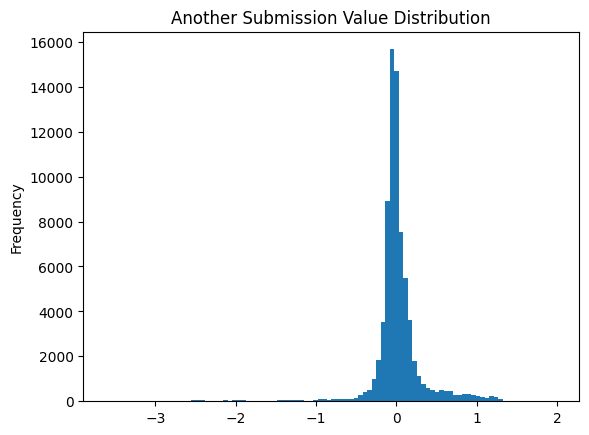

In [75]:
another_submission_df['value'].plot(kind='hist', bins=100, title='Another Submission Value Distribution')

<Axes: title={'center': 'My Submission Value Distribution'}, ylabel='Frequency'>

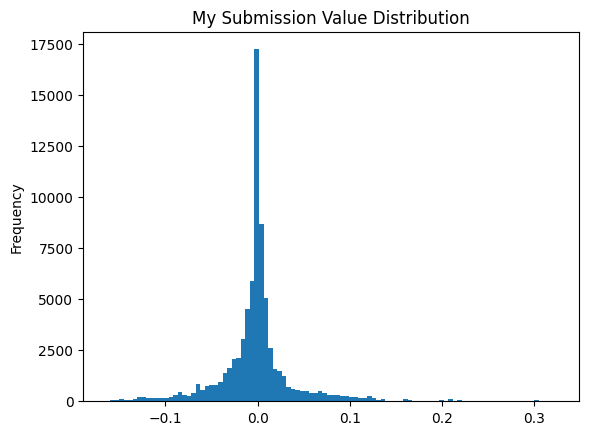

In [76]:
submission_df['value'].plot(kind='hist', bins=100, title='My Submission Value Distribution')

<Axes: title={'center': 'My Submission Value Line Plot'}>

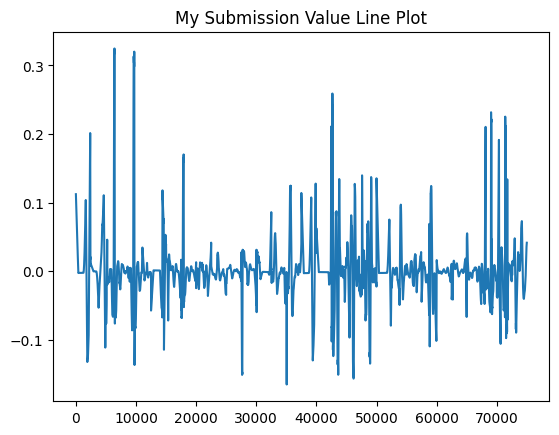

In [77]:
submission_df['value'].plot(kind='line', title='My Submission Value Line Plot')

<Axes: title={'center': 'Another Submission Value Line Plot'}>

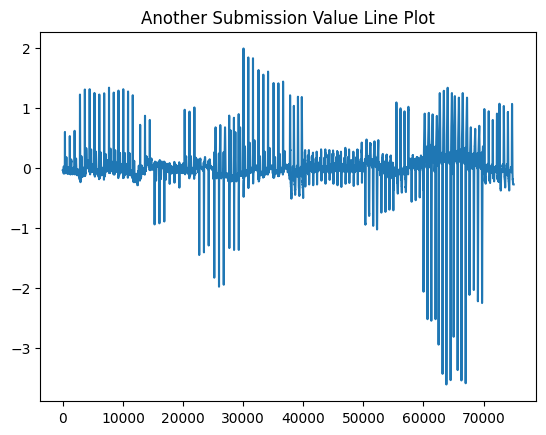

In [59]:
another_submission_df['value'].plot(kind='line', title='Another Submission Value Line Plot')

<Axes: title={'center': 'Frozen Submission Value Distribution'}, ylabel='Frequency'>

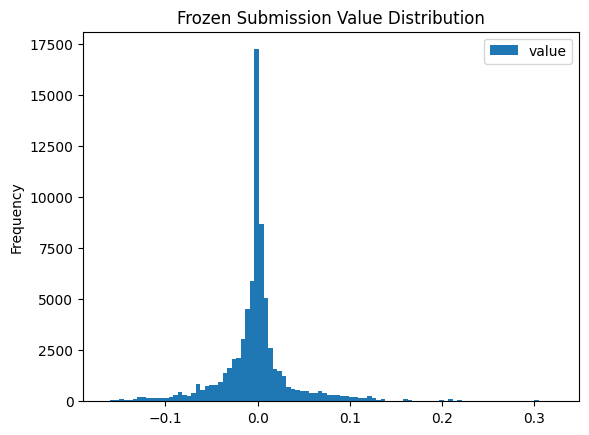

In [78]:
def freeze_submission(df:pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df["value"] = df["value"].clip(-1.5, 1.5)
    return df

submission_df_frozen = freeze_submission(submission_df)
submission_df_frozen.plot(kind='hist', bins=100, title='Frozen Submission Value Distribution')

<Axes: title={'center': 'My Submission Value Line Plot'}>

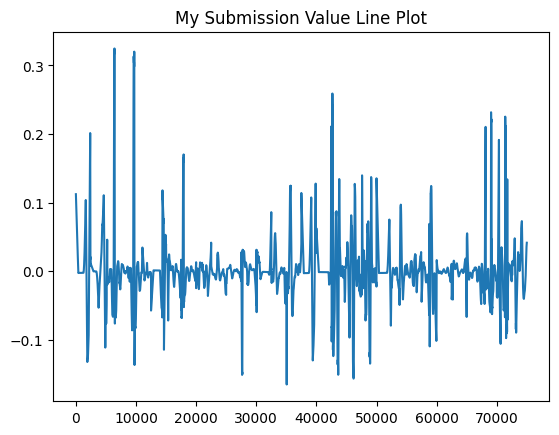

In [79]:
submission_df_frozen['value'].plot(kind='line', title='My Submission Value Line Plot')